# EDA
The logic of EDA process:
1. **Check the basic situation of the data set**: the data type of each feature, whether there are missing values, outliers
2. **Data visualization**: Visualize the relationship between individual features and y and the relationship between multiple variables and y
3. **Data processing**: Process the data based on the data set, such as converting multi-classification variables to one-hot encoding, binary classification variables to 0-1 encoding, and time variables to time conversion
4. **Data verification**: Ensure that the data is directly available when the model is built

### Importing the Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

## 1 Description of dataset

In [2]:
# load the dataset
df=pd.read_csv('../data/raw/bank/bank-full.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


As We can see that after deletion, the dataset has 41,188 data points and 15 features, and none of the features have missing values.

## 2 Visualisation

### 2.1 individual Feature distribution

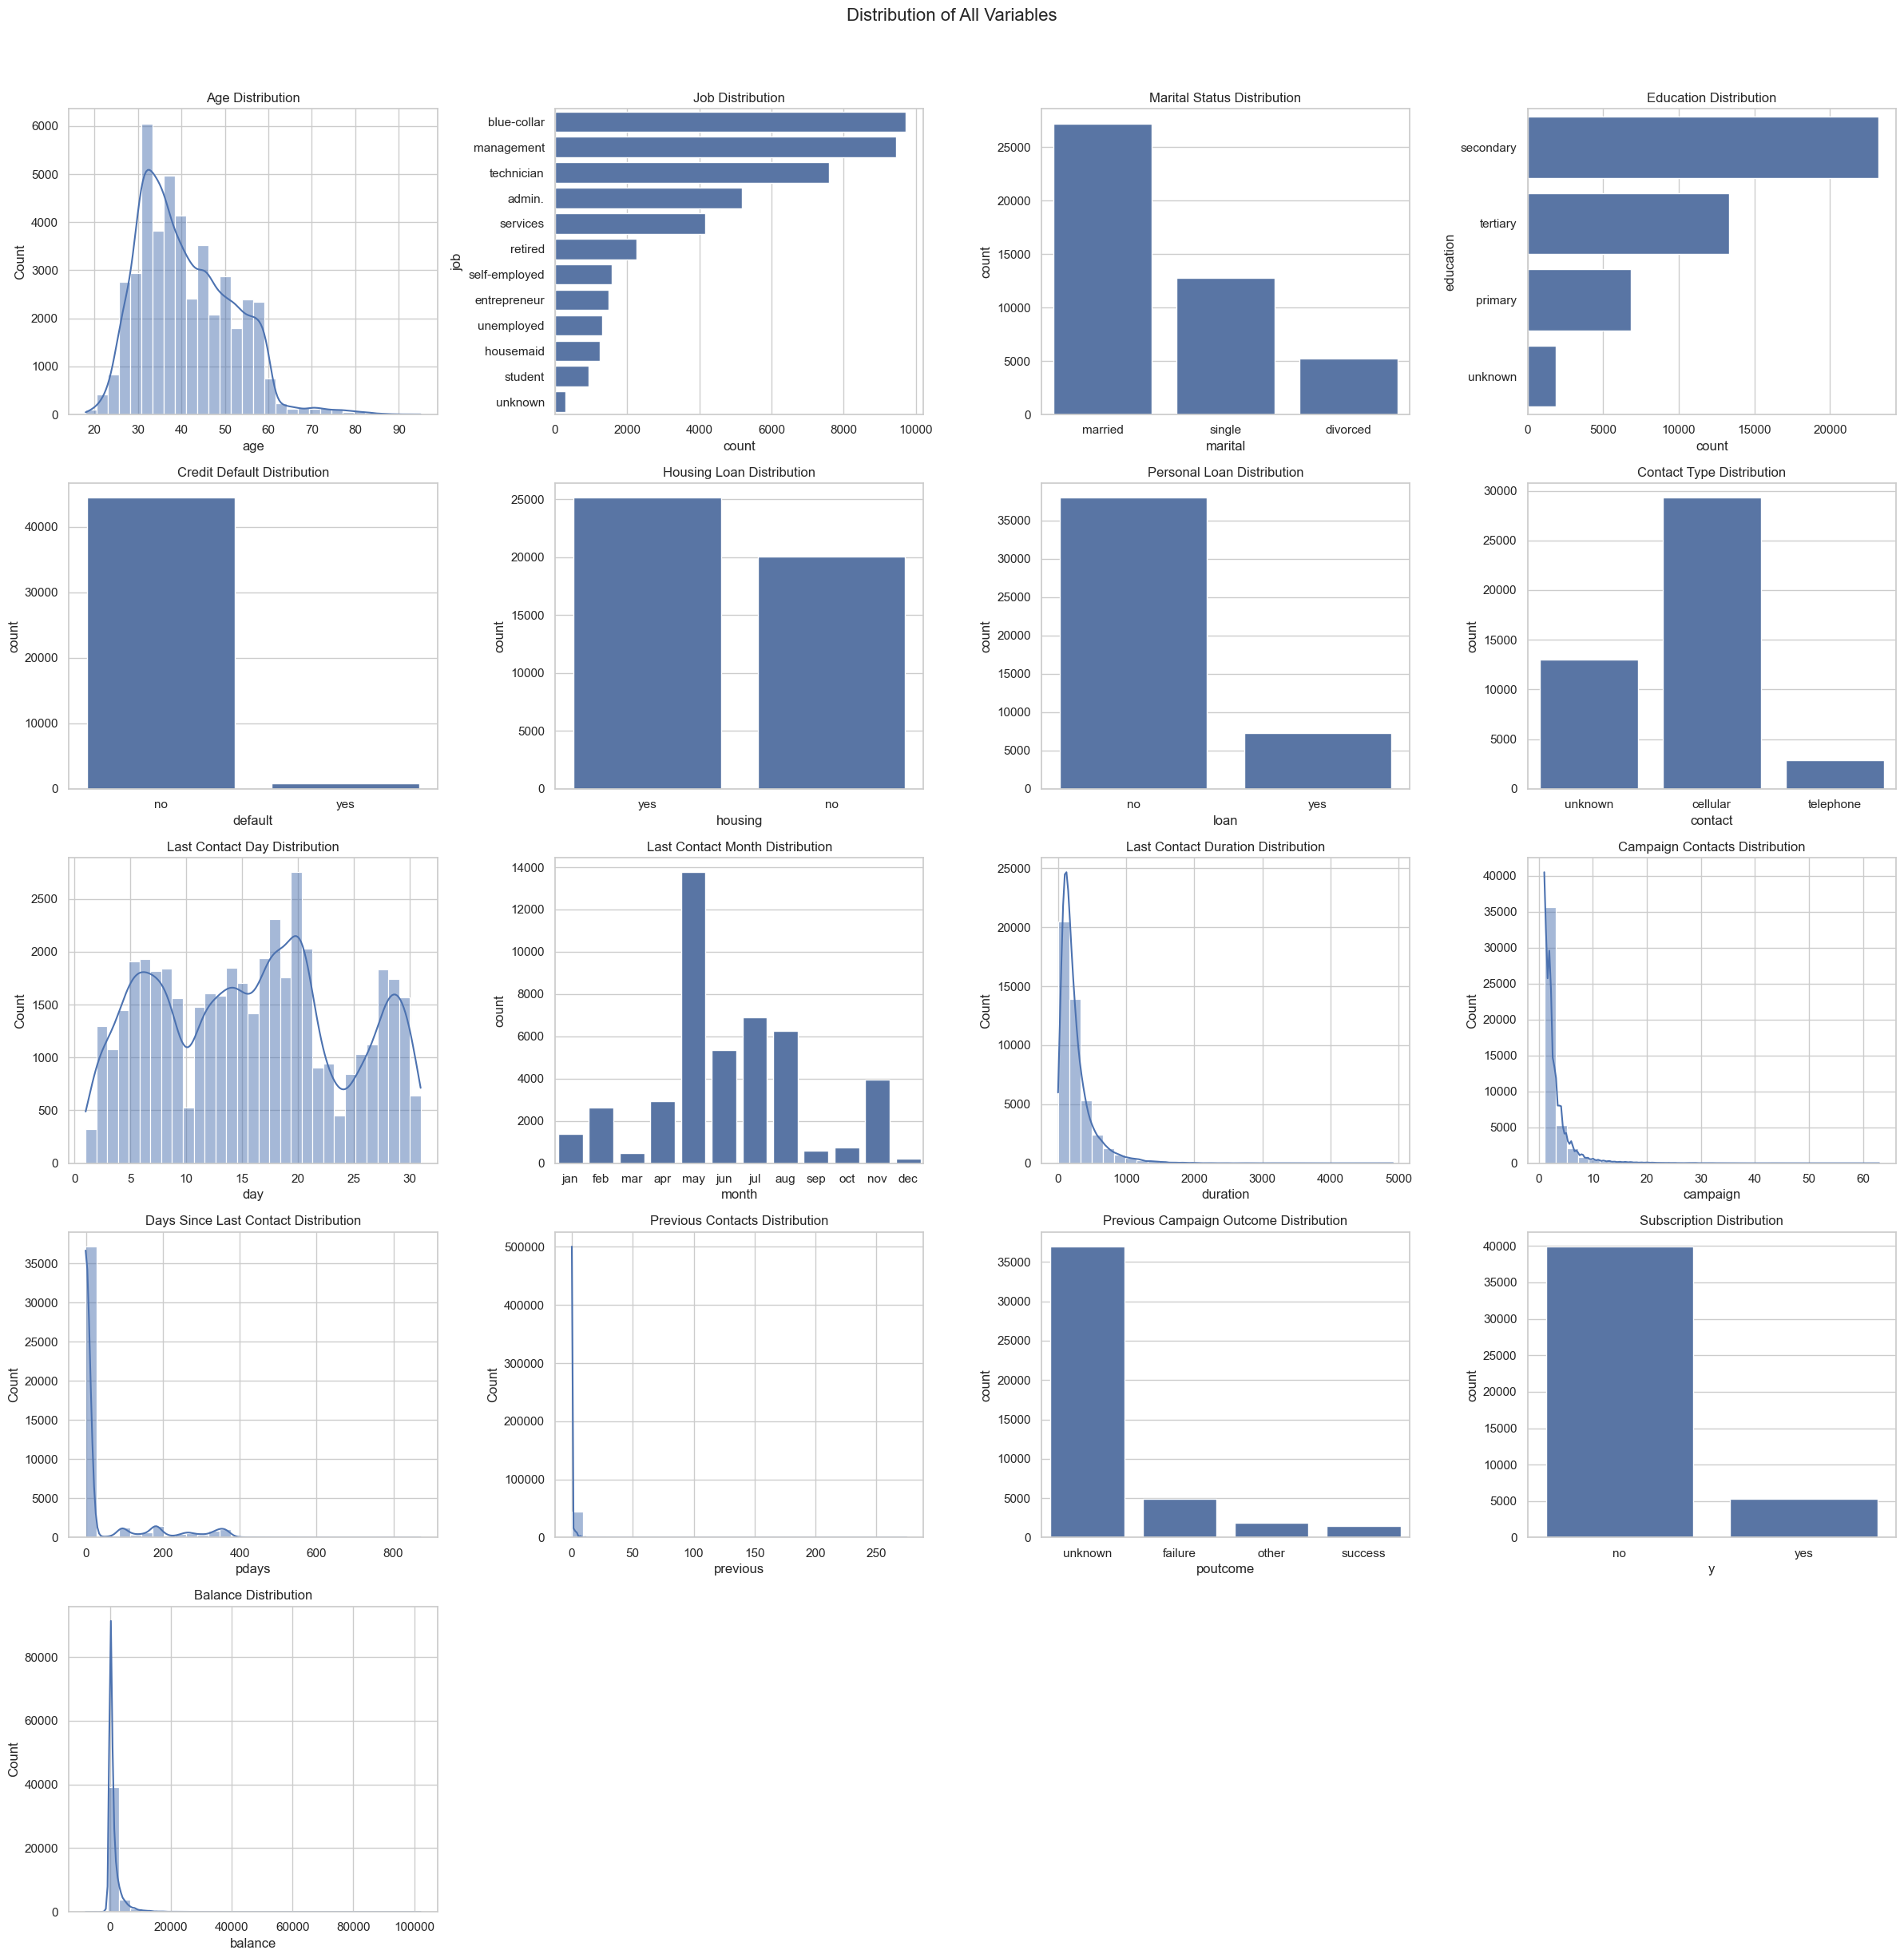

In [6]:
# Set the graphics style
sns.set(style="whitegrid")

# Plot the distribution of all variables
fig, axes = plt.subplots(5, 4, figsize=(24, 25))
fig.suptitle('Distribution of All Variables', fontsize=16)

# 1. age
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# 2. job
sns.countplot(y='job', data=df, ax=axes[0, 1], order=df['job'].value_counts().index)
axes[0, 1].set_title('Job Distribution')

# 3. marital
sns.countplot(x='marital', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Marital Status Distribution')

# 4. education
sns.countplot(y='education', data=df, ax=axes[0, 3], order=df['education'].value_counts().index)
axes[0, 3].set_title('Education Distribution')

# 5. default
sns.countplot(x='default', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Credit Default Distribution')

# 6. housing
sns.countplot(x='housing', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Housing Loan Distribution')

# 7. loan
sns.countplot(x='loan', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Personal Loan Distribution')

# 8. contact
sns.countplot(x='contact', data=df, ax=axes[1, 3])
axes[1, 3].set_title('Contact Type Distribution')

# 9. day
sns.histplot(df['day'], bins=31, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Last Contact Day Distribution')

# 10. month
sns.countplot(x='month', data=df, ax=axes[2, 1], order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
axes[2, 1].set_title('Last Contact Month Distribution')

# 11. duration
sns.histplot(df['duration'], bins=30, kde=True, ax=axes[2, 2])
axes[2, 2].set_title('Last Contact Duration Distribution')

# 12. campaign
sns.histplot(df['campaign'], bins=30, kde=True, ax=axes[2, 3])
axes[2, 3].set_title('Campaign Contacts Distribution')

# 13. pdays
sns.histplot(df['pdays'], bins=30, kde=True, ax=axes[3, 0])
axes[3, 0].set_title('Days Since Last Contact Distribution')

# 14. previous
sns.histplot(df['previous'], bins=30, kde=True, ax=axes[3, 1])
axes[3, 1].set_title('Previous Contacts Distribution')

# 15. poutcome
sns.countplot(x='poutcome', data=df, ax=axes[3, 2])
axes[3, 2].set_title('Previous Campaign Outcome Distribution')

# 16. subscription
sns.countplot(x='y', data=df, ax=axes[3, 3])
axes[3, 3].set_title('Subscription Distribution')

# 17. balance
sns.histplot(df['balance'], bins=30, kde=True, ax=axes[4, 0])
axes[4, 0].set_title('Balance Distribution')

# Hide empty subplots
for i in range(1, 4):
    fig.delaxes(axes[4, i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### 2.2 individual feature related to subscription

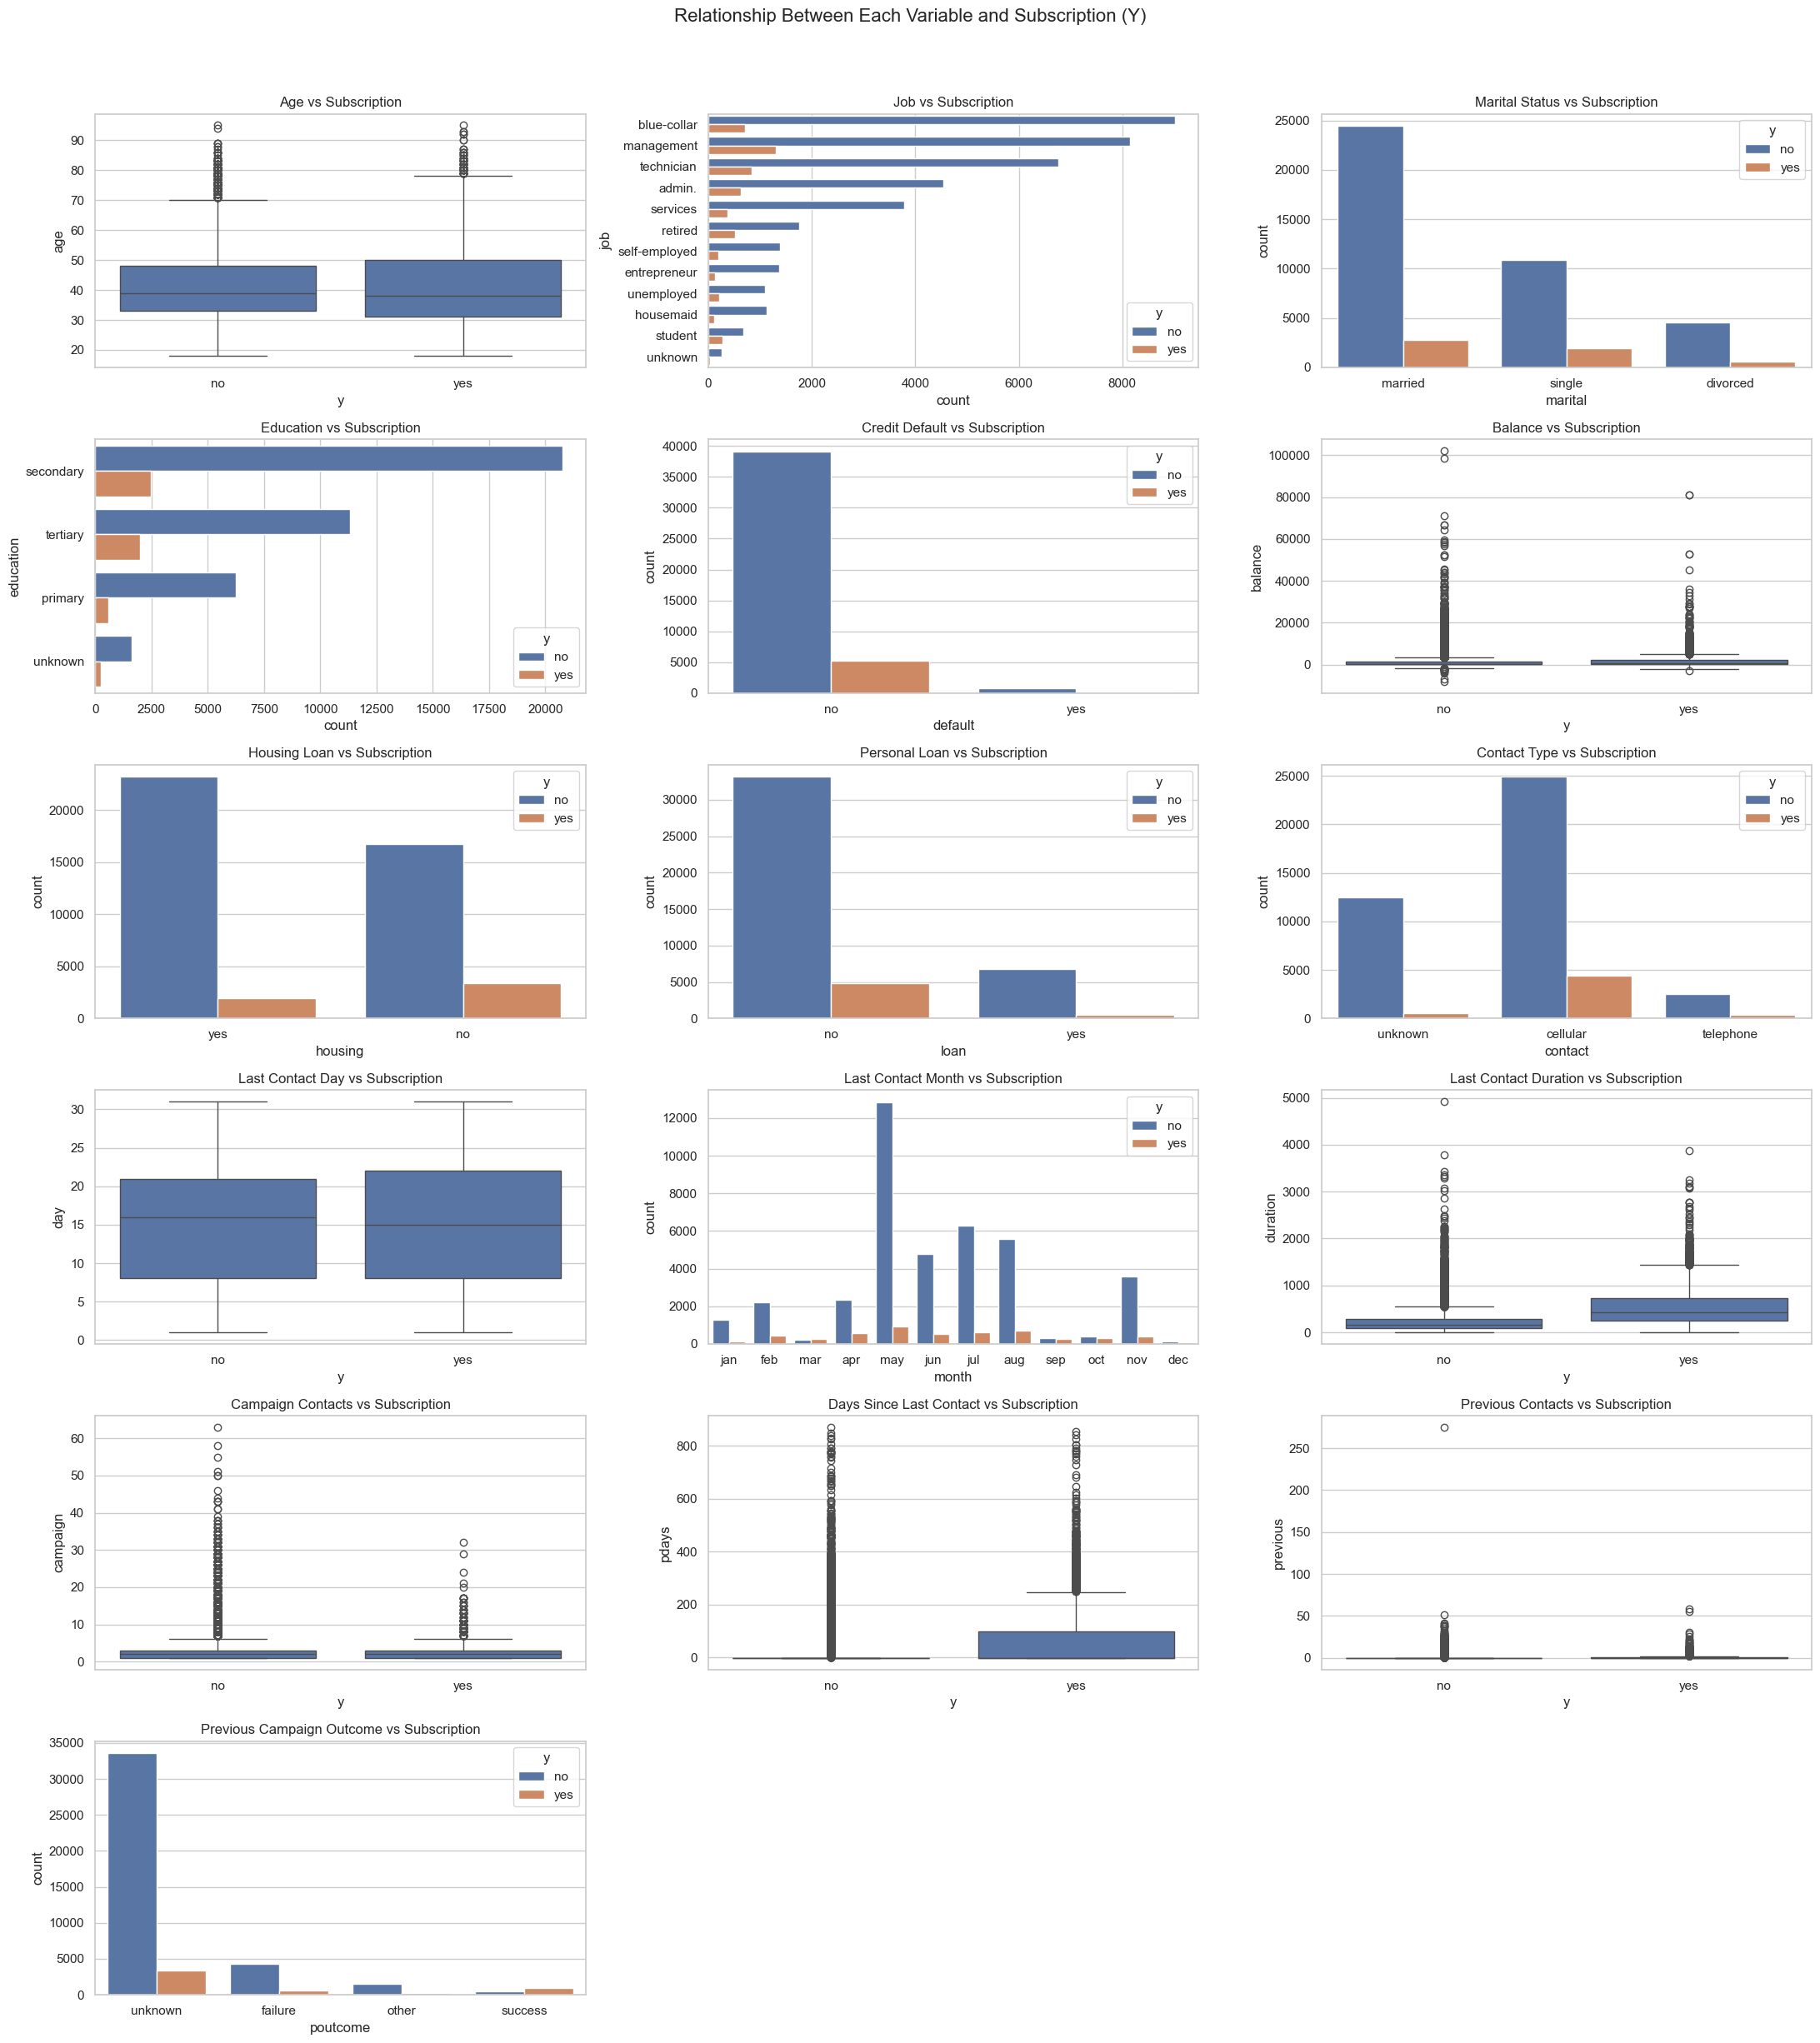

In [11]:
# Set the graphics style
sns.set(style="whitegrid")

# Plot each variable against y
fig, axes = plt.subplots(6, 3, figsize=(22, 25))
fig.suptitle('Relationship Between Each Variable and Subscription (Y)', fontsize=16)

# 1. age vs y
sns.boxplot(x='y', y='age', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Age vs Subscription')

# 2. job vs y
sns.countplot(y='job', hue='y', data=df, ax=axes[0, 1], order=df['job'].value_counts().index)
axes[0, 1].set_title('Job vs Subscription')

# 3. marital vs y
sns.countplot(x='marital', hue='y', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Marital Status vs Subscription')

# 4. education vs y
sns.countplot(y='education', hue='y', data=df, ax=axes[1, 0], order=df['education'].value_counts().index)
axes[1, 0].set_title('Education vs Subscription')

# 5. default vs y
sns.countplot(x='default', hue='y', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Credit Default vs Subscription')

# 6. balance vs y (moved here, after default)
sns.boxplot(x='y', y='balance', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Balance vs Subscription')

# 7. housing vs y
sns.countplot(x='housing', hue='y', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Housing Loan vs Subscription')

# 8. loan vs y
sns.countplot(x='loan', hue='y', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Personal Loan vs Subscription')

# 9. contact vs y
sns.countplot(x='contact', hue='y', data=df, ax=axes[2, 2])
axes[2, 2].set_title('Contact Type vs Subscription')

# 10. day vs y
sns.boxplot(x='y', y='day', data=df, ax=axes[3, 0])
axes[3, 0].set_title('Last Contact Day vs Subscription')

# 11. month vs y
sns.countplot(x='month', hue='y', data=df, ax=axes[3, 1], order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
axes[3, 1].set_title('Last Contact Month vs Subscription')

# 12. duration vs y
sns.boxplot(x='y', y='duration', data=df, ax=axes[3, 2])
axes[3, 2].set_title('Last Contact Duration vs Subscription')

# 13. campaign vs y
sns.boxplot(x='y', y='campaign', data=df, ax=axes[4, 0])
axes[4, 0].set_title('Campaign Contacts vs Subscription')

# 14. pdays vs y
sns.boxplot(x='y', y='pdays', data=df, ax=axes[4, 1])
axes[4, 1].set_title('Days Since Last Contact vs Subscription')

# 15. previous vs y
sns.boxplot(x='y', y='previous', data=df, ax=axes[4, 2])
axes[4, 2].set_title('Previous Contacts vs Subscription')

# 16. poutcome vs y
sns.countplot(x='poutcome', hue='y', data=df, ax=axes[5, 0])
axes[5, 0].set_title('Previous Campaign Outcome vs Subscription')

# Hide empty subplots
for i in range(1, 3):
    fig.delaxes(axes[5, i])

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### 2.3 Independent Variables Interaction

In [18]:
label_encoded_df =df.copy()
# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to apply label encoding
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','poutcome', 'y']

# Apply label encoding to each categorical column
for column in categorical_columns:
    label_encoded_df[column] = label_encoder.fit_transform(label_encoded_df[column])

#deal with time variable(month, day_of_week)
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

# Mapping Values
label_encoded_df["month"] = label_encoded_df["month"].map(month_mapping)

# Check the updated dataframe with encoded columns
print(label_encoded_df.head())


   age  job  marital  education  default  balance  housing  loan  contact   
0   58    4        1          2        0     2143        1     0        2  \
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      5       261         1     -1         0         3  0  
1    5      5       151         1     -1         0         3  0  
2    5      5        76         1     -1         0         3  0  
3    5      5        92         1     -1         0         3  0  
4    5      5       198         1     -1         0         3  0  


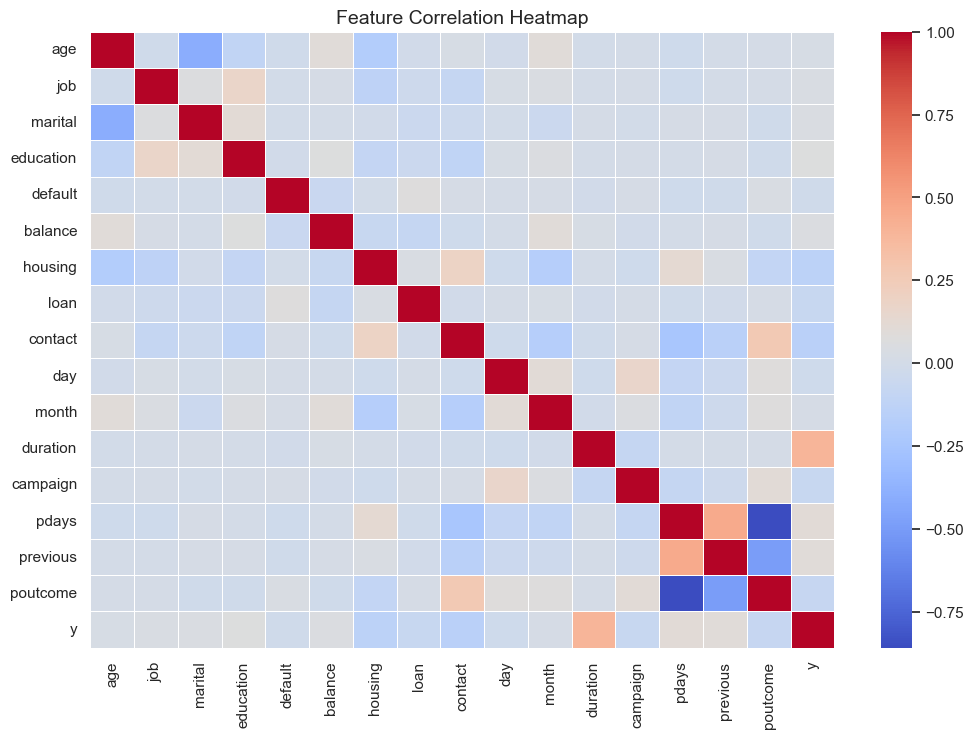

In [19]:
corr_matrix = label_encoded_df.corr()
plt.figure(figsize=(12, 8))

# Heat Map
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)

# Title
plt.title("Feature Correlation Heatmap", fontsize=14)

# show image
plt.show()

### 2.4 Interaction values with subcription visualisation
1. age&martial
2. job&education
3. housing&contact
4. contact&poutcome
5. previous&pdays
6. pdays&poutcome
7. poutcome&previous

### 2.4.1 subscription rate of age&martial

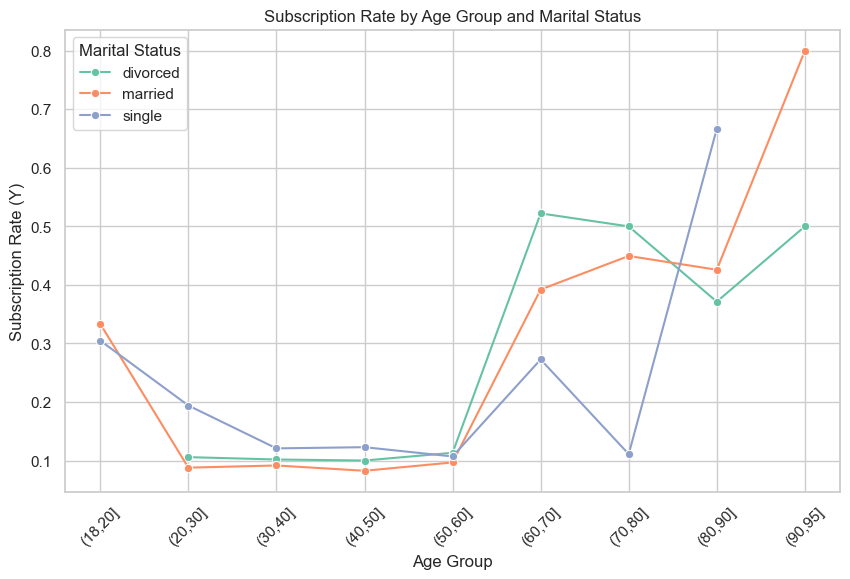

In [30]:
y_encoded_df = df.copy()

# Convert y to numeric type: 'yes' -> 1, 'no' -> 0
y_encoded_df['y'] = y_encoded_df['y'].map({'yes': 1, 'no': 0})

# # Divide age into bins (e.g., 10-year intervals)
bins = [18, 20] + list(range(30, 100, 10)) + [95]  # First add (18, 20], then continue with the 10-year interval
labels = [f"({bins[i]},{bins[i+1]}]" for i in range(len(bins)-1)]  # Generate labels that conform to the cut rules
y_encoded_df['age_group'] = pd.cut(y_encoded_df['age'], bins=bins, labels=labels, ordered=True)

# Group by marital and age_group and calculate the mean of y (subscription ratio)
grouped_data = y_encoded_df.groupby(['marital', 'age_group'])['y'].mean().reset_index()

# Convert age_group to string type
grouped_data['age_group'] = grouped_data['age_group'].astype(str)

# Draw a grouped bar chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='age_group', y='y', hue='marital', data=grouped_data, palette='Set2', marker='o')
plt.title('Subscription Rate by Age Group and Marital Status')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate (Y)')
plt.legend(title='Marital Status')
plt.grid(True)  # Add grid lines
plt.xticks(rotation=45)
plt.show()

### 2.4.2 subscription rate of education & job type

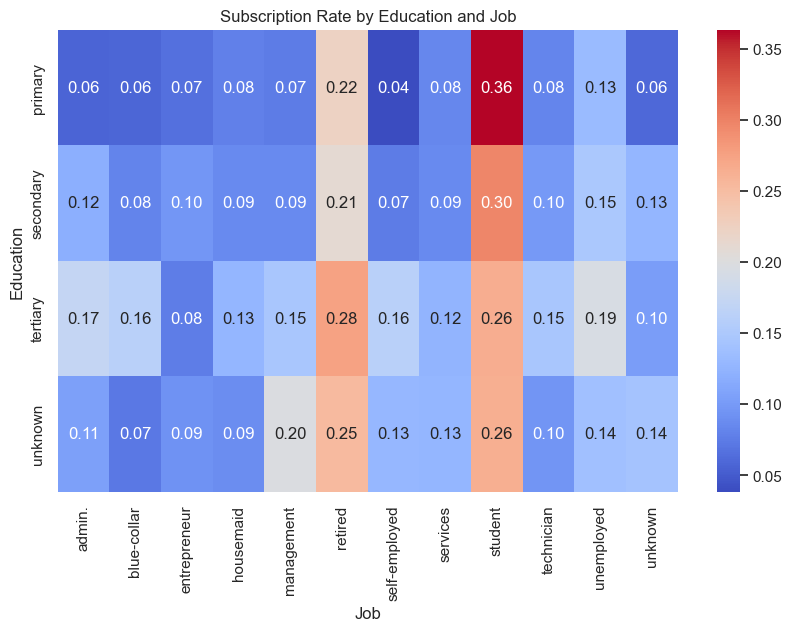

In [ ]:
# Group by education and job and calculate the mean of y
heatmap_data = y_encoded_df.groupby(['education', 'job'])['y'].mean().unstack()

# Draw a heat map
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Subscription Rate by Education and Job')
plt.xlabel('Job')
plt.ylabel('Education')
plt.show()

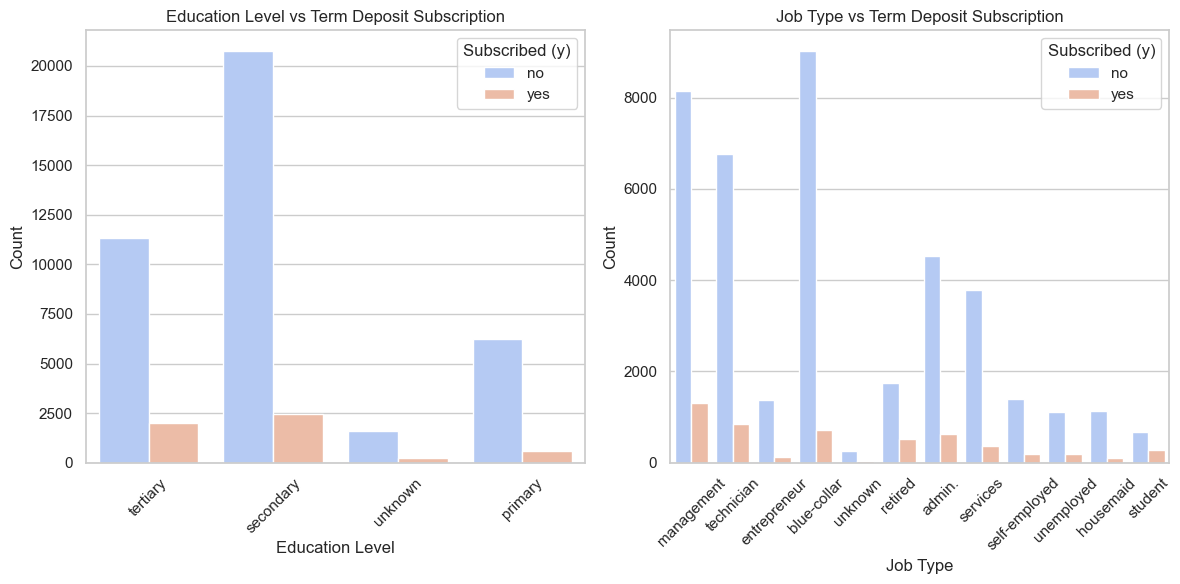

In [32]:
# Set figure size
plt.figure(figsize=(12, 6))

# Grouped bar plot for Education vs y
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="education", hue="y", palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Education Level vs Term Deposit Subscription")
plt.legend(title="Subscribed (y)")

# Grouped bar plot for Job vs y
plt.subplot(1, 2, 2)
sns.countplot(data=df, x="job", hue="y", palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Job Type")
plt.ylabel("Count")
plt.title("Job Type vs Term Deposit Subscription")
plt.legend(title="Subscribed (y)")

plt.tight_layout()
plt.show()


### 2.4.3 Subscription Distribution of Default & Contact Type

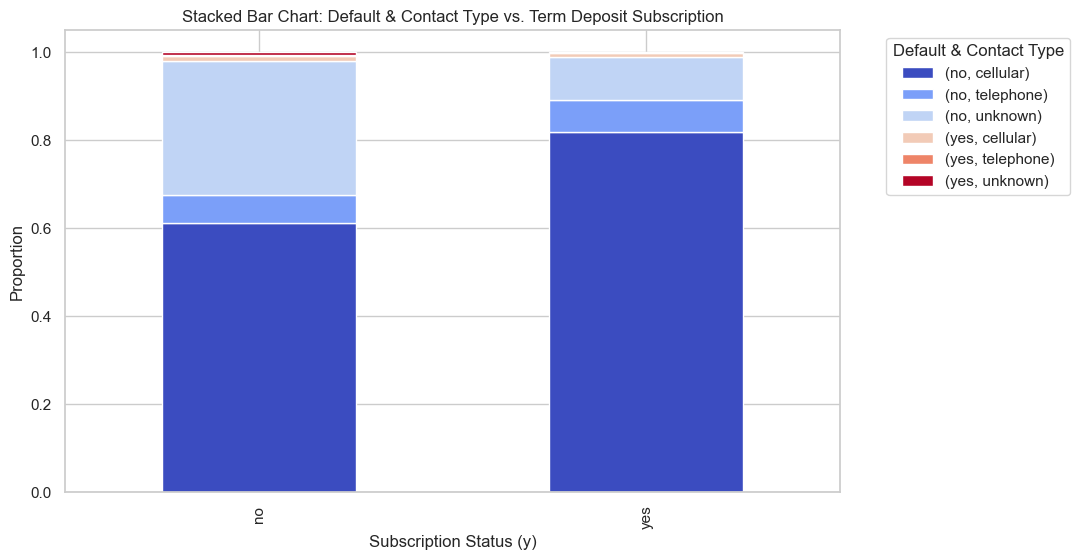

In [33]:
# Create a crosstab for stacked bar chart
df_grouped = pd.crosstab(index=[df['y']], columns=[df['default'], df['contact']])

# Normalize to get proportions
df_grouped = df_grouped.div(df_grouped.sum(axis=1), axis=0)

# Plot the stacked bar chart
df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="coolwarm")

# Labels and title
plt.xlabel("Subscription Status (y)")
plt.ylabel("Proportion")
plt.title("Stacked Bar Chart: Default & Contact Type vs. Term Deposit Subscription")
plt.legend(title="Default & Contact Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### 2.4.4 Subscription Rate by Contact Type & Month

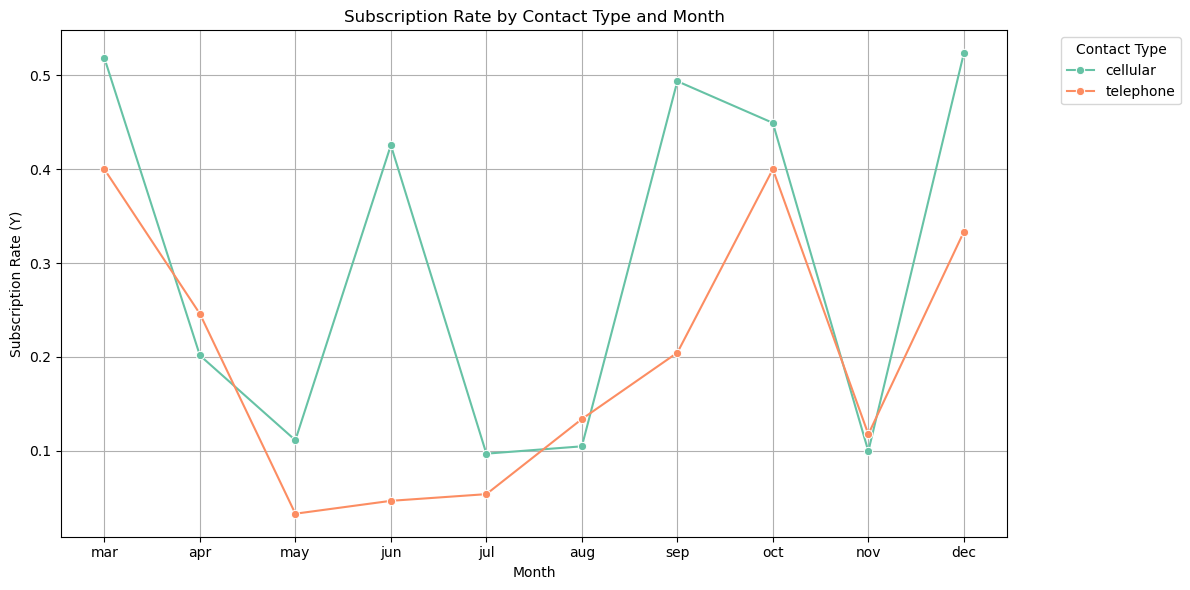

In [65]:
# Define the correct order of months
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Convert the month column to an ordinal categorical variable
y_encoded_df['month'] = pd.Categorical(y_encoded_df['month'], categories=month_order, ordered=True)
# Group by contact and month and calculate the mean of y (subscription ratio)
grouped_data = y_encoded_df.groupby(['contact', 'month'])['y'].mean().reset_index()
# Draw a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='y', hue='contact', data=grouped_data, palette='Set2', marker='o')
plt.title('Subscription Rate by Contact Type and Month')
plt.xlabel('Month')
plt.ylabel('Subscription Rate (Y)')
plt.legend(title='Contact Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)  # Adding Grid Lines
plt.tight_layout()
plt.show()

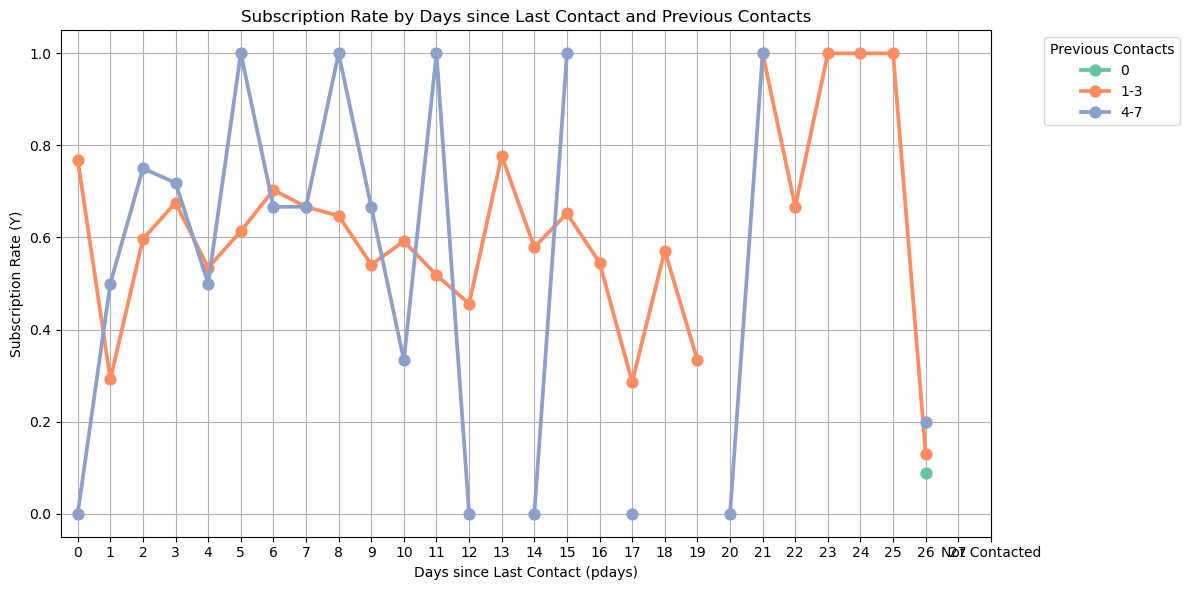

In [87]:
# Replace 999 in pdays with 28
y_encoded_df['pdays'] = y_encoded_df['pdays'].replace(999, 28)

# Bin previous
y_encoded_df['previous_bin'] = pd.cut(y_encoded_df['previous'], bins=[-1, 0, 3, 7], labels=['0', '1-3', '4-7'])

# Group by previous_bin and pdays and calculate the mean of y (subscription ratio)
grouped_data = y_encoded_df.groupby(['previous_bin', 'pdays'])['y'].mean().reset_index()

# Draw a dot plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='pdays', y='y', hue='previous_bin', data=grouped_data, palette='Set2')
plt.title('Subscription Rate by Days since Last Contact and Previous Contacts')
plt.xlabel('Days since Last Contact (pdays)')
plt.ylabel('Subscription Rate (Y)')

# Customize the X-axis scale
plt.xticks(list(range(0, 29)), list(range(0, 28)) + ['Not Contacted'])
plt.legend(title='Previous Contacts', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

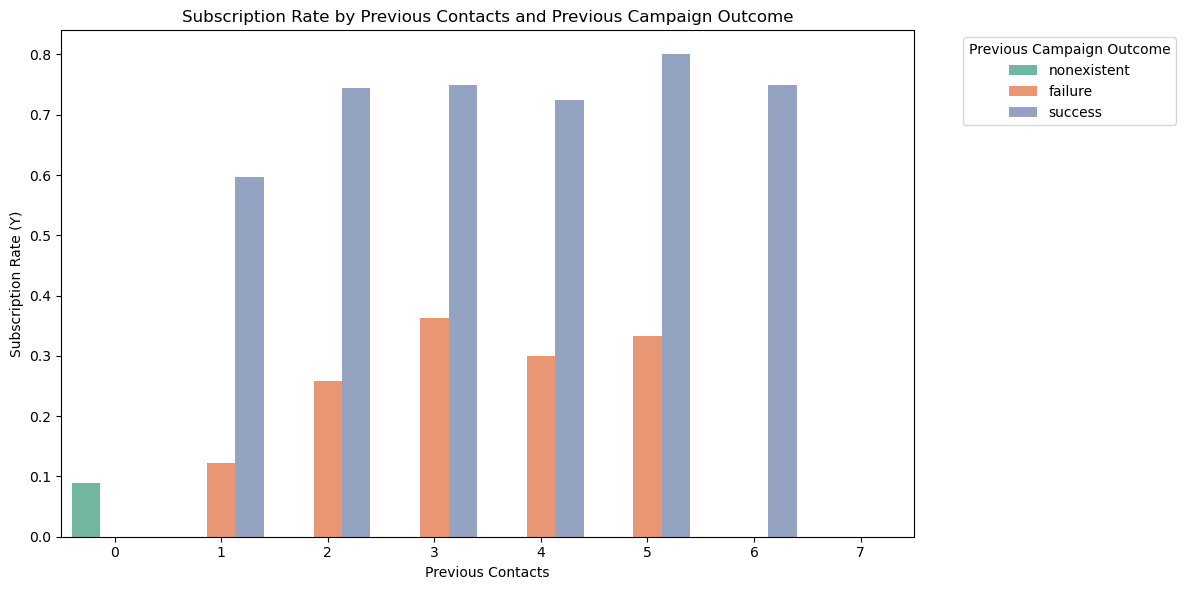

In [88]:
# Group by poutcome and previous and calculate the mean of y (subscription ratio)
grouped_data = y_encoded_df.groupby(['poutcome', 'previous'])['y'].mean().reset_index()

# Draw a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='previous', y='y', hue='poutcome', data=grouped_data, palette='Set2')
plt.title('Subscription Rate by Previous Contacts and Previous Campaign Outcome')
plt.xlabel('Previous Contacts')
plt.ylabel('Subscription Rate (Y)')
plt.legend(title='Previous Campaign Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()